Libraries

In [ ]:
import numpy as np
import random
import math, random
import matplotlib.pyplot as plt

tai12b

In [ ]:
# --- Distance Matrix from user's pasted data ---
distance_matrix = np.array([
    [0, 0, 0, 255, 293, 328, 331, 318, 362, 221, 314, 390],
    [0, 0, 1, 255, 293, 329, 331, 318, 363, 222, 314, 390],
    [0, 1, 0, 255, 293, 328, 330, 318, 362, 221, 313, 390],
    [255, 255, 255, 0, 93, 120, 106, 106, 113, 81, 63, 195],
    [293, 293, 293, 93, 0, 35, 42, 25, 95, 72, 75, 107],
    [328, 329, 328, 120, 35, 0, 24, 13, 82, 107, 82, 75],
    [331, 331, 330, 106, 42, 24, 0, 20, 59, 111, 60, 91],
    [318, 318, 318, 106, 25, 13, 20, 0, 78, 97, 71, 89],
    [362, 363, 362, 113, 95, 82, 59, 78, 0, 152, 50, 129],
    [221, 222, 221, 81, 72, 107, 111, 97, 152, 0, 111, 173],
    [314, 314, 313, 63, 75, 82, 60, 71, 50, 111, 0, 150],
    [390, 390, 390, 195, 107, 75, 91, 89, 129, 173, 150, 0]
])

# --- Flow Matrix from user's pasted data ---
flow_matrix = np.array([
    [0, 0, 5, 1, 1, 14261, 246, 55342, 0, 1, 36, 1828],
    [1, 0, 14568, 1064, 4, 0, 58098, 6273, 2, 3, 0, 57],
    [25642, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0],
    [27, 0, 62, 0, 0, 1, 0, 2491, 0, 0, 490, 0],
    [0, 57, 0, 0, 0, 0, 456, 9591, 0, 0, 1036, 0],
    [0, 3797, 7, 0, 0, 0, 9, 0, 41986, 19780, 5, 0],
    [948, 14543, 1, 93, 0, 5, 0, 3720, 0, 2, 39, 759],
    [0, 0, 0, 8, 0, 2, 3516, 0, 0, 2106, 0, 20364],
    [2911, 10710, 9, 30, 5399, 0, 0, 0, 0, 867, 0, 0],
    [0, 3, 47029, 264, 4880, 1, 5417, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 12262, 2791, 0, 0, 5, 7632, 0, 0],
    [0, 36146, 0, 0, 525, 49, 1, 19, 0, 0, 35539, 0]
])

Cost Function

In [ ]:
# --- Cost Function ---
def calculate_cost(solution, flow, dist):
    return sum(flow[i][j] * dist[solution[i]][solution[j]] for i in range(len(solution)) for j in range(len(solution)))

Neighbouring Functions

In [ ]:
# --- Neighbor Functions ---
def neighbor_swap(s):
    s = s.copy()
    i, j = random.sample(range(len(s)), 2)
    s[i], s[j] = s[j], s[i]
    return s

def neighbor_insert(s):
    s = s.copy()
    i, j = random.sample(range(len(s)), 2)
    elem = s.pop(i)
    s.insert(j, elem)
    return s

def neighbor_reverse(s):
    s = s.copy()
    i, j = sorted(random.sample(range(len(s)), 2))
    s[i:j+1] = reversed(s[i:j+1])
    return s

def neighbor_three_swap(s):
    s = s.copy()
    i, j, k = sorted(random.sample(range(len(s)), 3))
    s[i], s[j], s[k] = s[k], s[i], s[j]
    return s


Roulette Wheel Selection Logic

In [ ]:
neighbor_functions = [neighbor_swap, neighbor_insert, neighbor_reverse, neighbor_three_swap]
scores = [1.0 for _ in neighbor_functions]

# --- Roulette Wheel Selection ---
def roulette_wheel_select(weights):
    total = sum(weights)
    pick = random.uniform(0, total)
    current = 0
    for i, weight in enumerate(weights):
        current += weight
        if current > pick:
            return i
    return len(weights) - 1

Enhanced SA

In [ ]:
def enhanced_simulated_annealing(flow, dist, T0=100000, alpha=0.97, beta=1, Mk=20, max_temp_loops=1000, cooling='default'):
    n = len(flow)
    current_solution = list(range(n))
    random.shuffle(current_solution)
    current_cost = calculate_cost(current_solution, flow, dist)
    best_solution = current_solution[:]
    best_cost = current_cost
    T = T0
    k = 1  # start from 1 to avoid log(0)

    convergence = []  # To store best cost at each temperature step

    while k <= max_temp_loops:
        m = 0
        while m < Mk:
            idx = roulette_wheel_select(scores)
            neighbor = neighbor_functions[idx]
            candidate = neighbor(current_solution)
            candidate_cost = calculate_cost(candidate, flow, dist)

            delta = candidate_cost - current_cost
            if delta <= 0 or random.random() < math.exp(-delta / T):
                current_solution = candidate
                current_cost = candidate_cost
                scores[idx] += 1
                if current_cost < best_cost:
                    best_solution = current_solution[:]
                    best_cost = current_cost
            else:
                scores[idx] *= 0.99
            m += 1

        convergence.append(best_cost)  # Track the best cost at this temperature

        # --- Cooling ---
        if cooling == 'default':
            T *= alpha
        elif cooling == 'linear':
            T -= beta
            T = max(T, 1e-8)
        elif cooling == 'logarithmic':
            T = T0 / math.log(k + 1)
        else:
            raise ValueError(f"Unknown cooling method: {cooling}")

        k += 1

    return best_solution, best_cost, convergence


Simple SA

In [ ]:
def simulated_annealing_single_neighbor(flow, dist, T0=100000, alpha=0.97, beta=1,
                                        Mk=20, max_temp_loops=1000, cooling='default'):
    n = len(flow)
    current_solution = list(range(n))
    random.shuffle(current_solution)
    current_cost = calculate_cost(current_solution, flow, dist)

    best_solution = current_solution[:]
    best_cost = current_cost
    T = T0
    k = 1

    convergence = []

    while k <= max_temp_loops:
        for _ in range(Mk):
            candidate = neighbor_insert(current_solution)
            candidate_cost = calculate_cost(candidate, flow, dist)
            delta = candidate_cost - current_cost

            if delta <= 0 or random.random() < math.exp(-delta / T):
                current_solution = candidate
                current_cost = candidate_cost
                if current_cost < best_cost:
                    best_solution = current_solution[:]
                    best_cost = current_cost

        convergence.append(best_cost)

        # Cooling
        if cooling == 'default':
            T *= alpha
        elif cooling == 'linear':
            T -= beta
            T = max(T, 1e-8)
        elif cooling == 'logarithmic':
            T = T0 / math.log(k + 1)
        else:
            raise ValueError(f"Unknown cooling method: {cooling}")

        k += 1

    return best_solution, best_cost, convergence

Main

Enhanced SA - Run 1: Best Cost = 47,733,239
Single Neighbor SA - Run 1: Best Cost = 47,257,482
Enhanced SA - Run 2: Best Cost = 43,518,958
Single Neighbor SA - Run 2: Best Cost = 45,829,925
Enhanced SA - Run 3: Best Cost = 41,562,050
Single Neighbor SA - Run 3: Best Cost = 42,394,401
Enhanced SA - Run 4: Best Cost = 41,117,029
Single Neighbor SA - Run 4: Best Cost = 47,533,904
Enhanced SA - Run 5: Best Cost = 42,512,310
Single Neighbor SA - Run 5: Best Cost = 54,370,426
Enhanced SA - Run 6: Best Cost = 42,996,546
Single Neighbor SA - Run 6: Best Cost = 50,067,262
Enhanced SA - Run 7: Best Cost = 40,673,930
Single Neighbor SA - Run 7: Best Cost = 48,209,262
Enhanced SA - Run 8: Best Cost = 41,660,606
Single Neighbor SA - Run 8: Best Cost = 50,428,026
Enhanced SA - Run 9: Best Cost = 46,956,579
Single Neighbor SA - Run 9: Best Cost = 43,537,392
Enhanced SA - Run 10: Best Cost = 42,512,310
Single Neighbor SA - Run 10: Best Cost = 47,291,958

=== Summary Table: Enhanced SA ===
Algorithm	R.

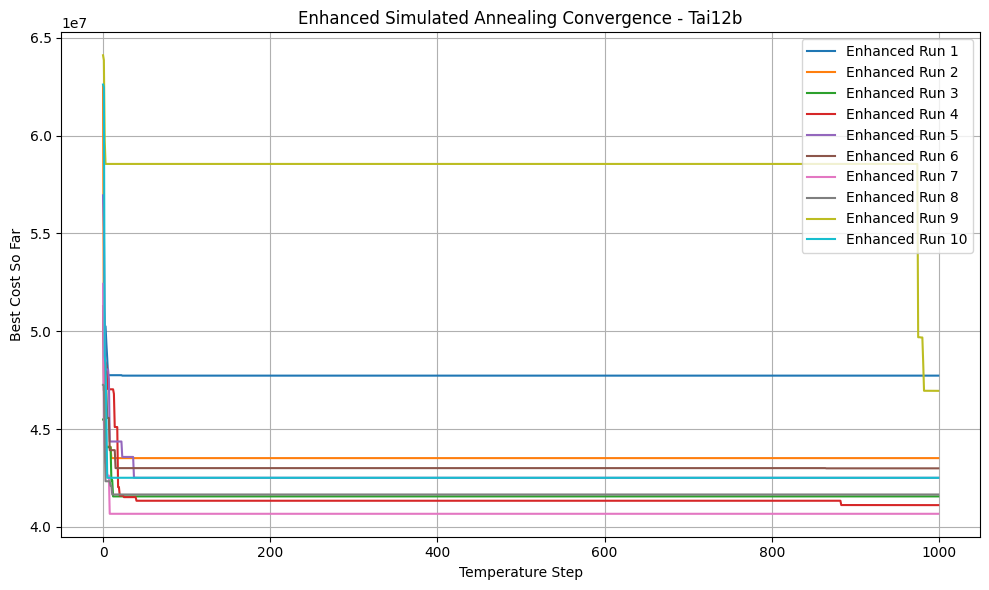

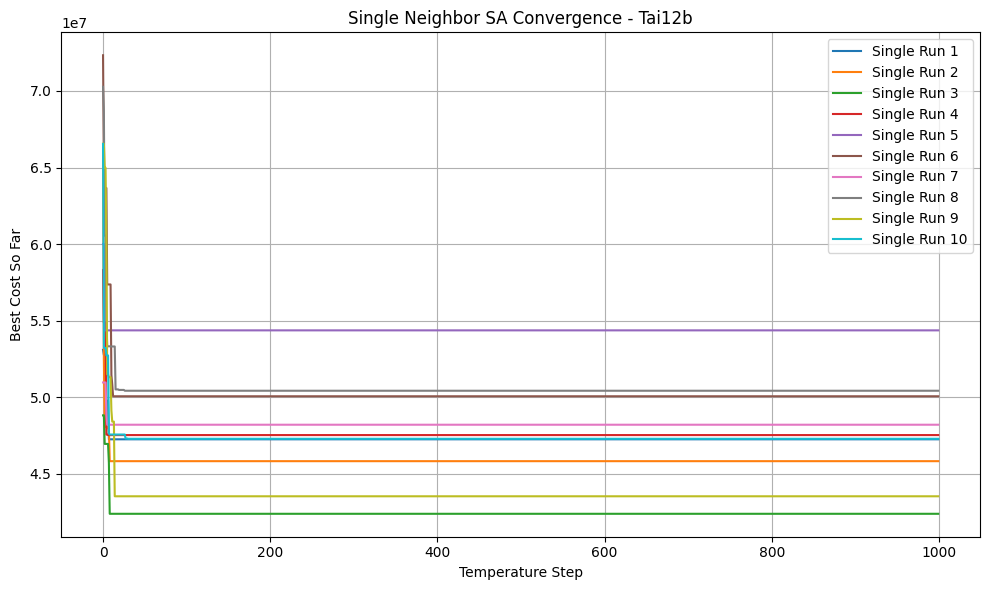

In [42]:
# --- Run the Algorithm 10 Times ---
problem_name = "Tai12b"
problem_size = distance_matrix.shape[0]

# Store results separately for both SA variants
results_single = []
results_enhanced = []
convergence_single = []
convergence_enhanced = []

# --- SA Parameters ---
T0 = 100000
alpha = 0.97
beta = 100  # Only used for linear cooling
Mk = 20
max_temp_loops = 1000
cooling_method = 'default'  # Options: 'default', 'linear', 'logarithmic'

# --- Run 10 times for both SA variants ---
for run in range(10):
    # Enhanced SA with multiple neighbors
    sol_e, cost_e, conv_e = enhanced_simulated_annealing(
        flow_matrix,
        distance_matrix,
        T0=T0,
        alpha=alpha,
        beta=beta,
        Mk=Mk,
        max_temp_loops=max_temp_loops,
        cooling=cooling_method
    )
    results_enhanced.append(cost_e)
    convergence_enhanced.append(conv_e)
    print(f"Enhanced SA - Run {run+1}: Best Cost = {cost_e:,}")

    # Standard SA with single neighbor
    sol_s, cost_s, conv_s = simulated_annealing_single_neighbor(
        flow_matrix,
        distance_matrix,
        T0=T0,
        alpha=alpha,
        beta=beta,
        Mk=Mk,
        max_temp_loops=max_temp_loops,
        cooling=cooling_method
    )
    results_single.append(cost_s)
    convergence_single.append(conv_s)
    print(f"Single Neighbor SA - Run {run+1}: Best Cost = {cost_s:,}")

# --- Summary Table Function ---
def print_summary_table(name, results):
    average = sum(results) / len(results)
    print(f"\n=== Summary Table: {name} ===")
    print("Algorithm\t" + "\t".join([f"R. {i+1}" for i in range(10)]) + "\tAverage")
    print(f"{name}\t" + "\t".join(f"{r:,}" for r in results) + f"\t{average:,.2f}")

print_summary_table("Enhanced SA", results_enhanced)
print_summary_table("Single Neighbor SA", results_single)

# --- Plot Convergence for Each SA Variant ---
plt.figure(figsize=(10, 6))
for i, conv in enumerate(convergence_enhanced):
    plt.plot(conv, label=f"Enhanced Run {i+1}")
plt.title(f"Enhanced Simulated Annealing Convergence - {problem_name}")
plt.xlabel("Temperature Step")
plt.ylabel("Best Cost So Far")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for i, conv in enumerate(convergence_single):
    plt.plot(conv, label=f"Single Run {i+1}")
plt.title(f"Single Neighbor SA Convergence - {problem_name}")
plt.xlabel("Temperature Step")
plt.ylabel("Best Cost So Far")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()